In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error


In [90]:
df = pd.read_csv('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/Reactive_Ion_Plasma/reactive_ion_etching_data.csv')
df.head()

,Run,Pressure,RF Power,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (%),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,1,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,2,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,3,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,4,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,5,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Run                            53 non-null     int64  
 1   Pressure                       53 non-null     int64  
 2   RF Power                       53 non-null     int64  
 3   Electrode Gap                  53 non-null     float64
 4   CCl4 Flow                      53 non-null     int64  
 5   He Flow                        53 non-null     int64  
 6   O2 Flow                        53 non-null     int64  
 7   Etch Rate - Rp (Å/min)         53 non-null     int64  
 8   Etch Uniformity – U (%)        53 non-null     float64
 9   Oxide Selectivity - Sox        53 non-null     float64
 10  Photoresist Selectivity - Sph  53 non-null     float64
dtypes: float64(4), int64(7)
memory usage: 4.7 KB


In [92]:
df = df.iloc[:,1:]
df.head()

,Pressure,RF Power,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (%),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


In [93]:
print(df.shape)

(53, 10)


In [94]:
df.describe()

,Pressure,RF Power,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (%),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,250.000000,350.000000,1.532075,123.547170,126.415094,15.000000,4204.283019,11.635849,6.988302,2.226981
std,45.641159,45.641159,0.267304,28.660859,59.729980,4.574175,689.441535,10.648241,2.186921,0.541315
min,131.000000,231.000000,1.200000,0.000000,50.000000,3.000000,2704.000000,0.500000,2.650000,1.320000
25%,200.000000,300.000000,1.200000,100.000000,50.000000,10.000000,3684.000000,3.900000,5.840000,1.970000
50%,250.000000,350.000000,1.500000,125.000000,125.000000,15.000000,4390.000000,8.300000,6.410000,2.100000
75%,300.000000,400.000000,1.800000,150.000000,200.000000,20.000000,4703.000000,15.100000,7.720000,2.310000
max,369.000000,469.000000,2.200000,184.000000,200.000000,27.000000,5515.000000,55.200000,15.150000,4.170000


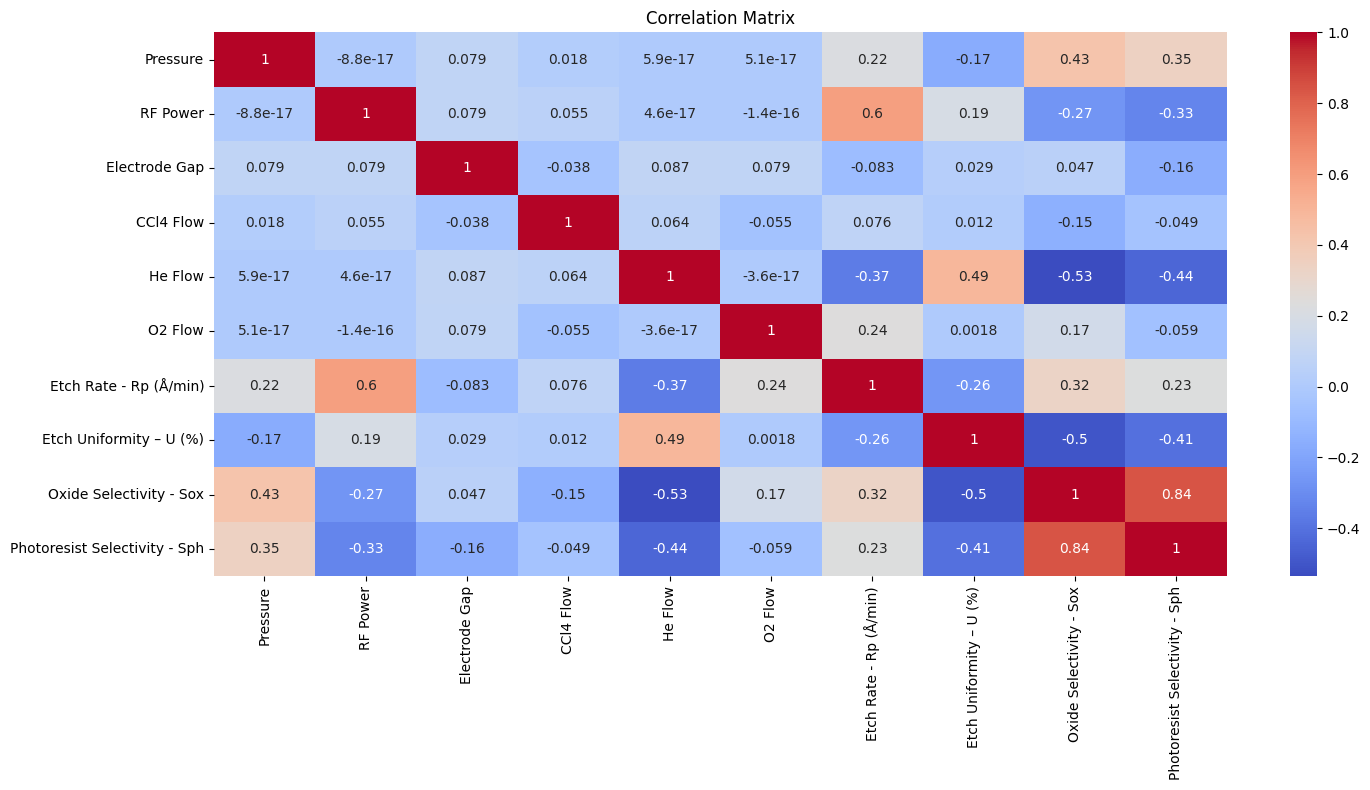

In [95]:
plt.figure(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [96]:
X_train= df.iloc[:, 0:6].values
X_test= df.iloc[:, 0:6].values
y_train = df.iloc[:, 6:].values
y_test = df.iloc[:, 6:].values

In [98]:
input_names = df.iloc[:, 0:6].columns.tolist()
target_names = df.iloc[:, 6:].columns.tolist()
print("Input features:", input_names)
print("Target variables:", target_names)

Input features: ['Pressure', 'RF Power', 'Electrode Gap', 'CCl4 Flow', 'He Flow', 'O2 Flow']
Target variables: ['Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (%)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Pressure'),
  Text(1, 0, 'RF Power'),
  Text(2, 0, 'Electrode Gap'),
  Text(3, 0, 'CCl4 Flow'),
  Text(4, 0, 'He Flow'),
  Text(5, 0, 'O2 Flow')])

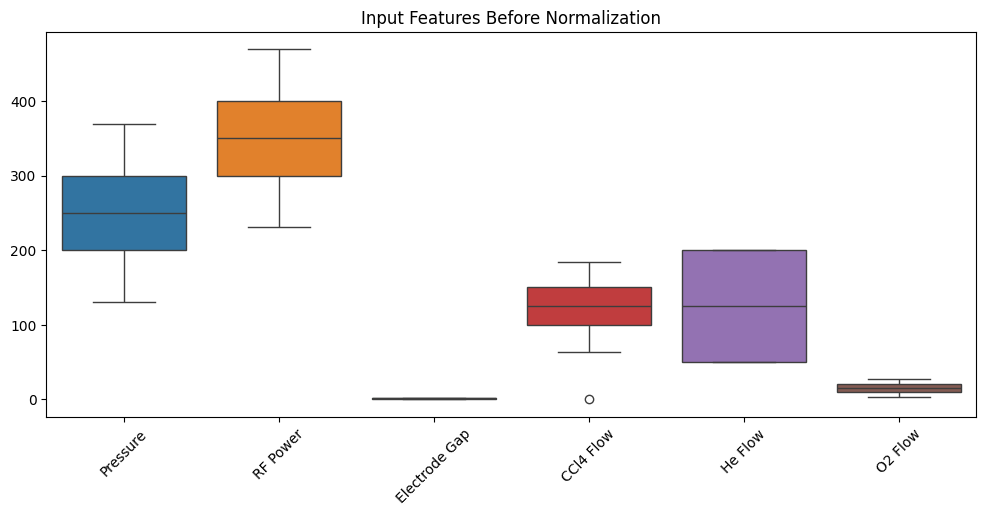

In [99]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=pd.DataFrame(X_train, columns=input_names))
plt.title("Input Features Before Normalization")
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Etch Rate - Rp (Å/min)'),
  Text(1, 0, 'Etch Uniformity – U (%)'),
  Text(2, 0, 'Oxide Selectivity - Sox'),
  Text(3, 0, 'Photoresist Selectivity - Sph')])

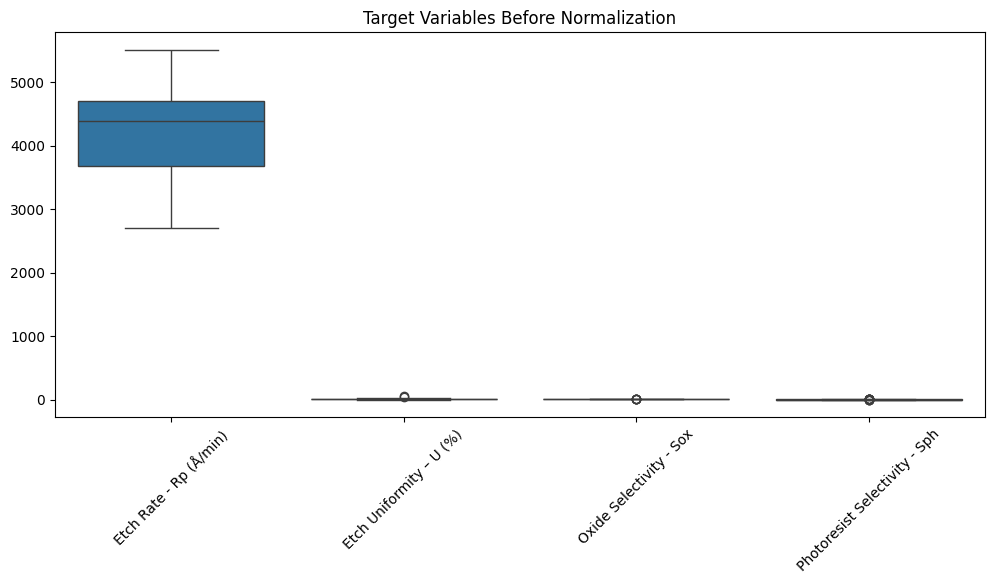

In [100]:
plt.figure(figsize=(12, 5))
sns.boxplot(data = pd.DataFrame(y_train, columns=target_names))
plt.title("Target Variables Before Normalization")
plt.xticks(rotation = 45)

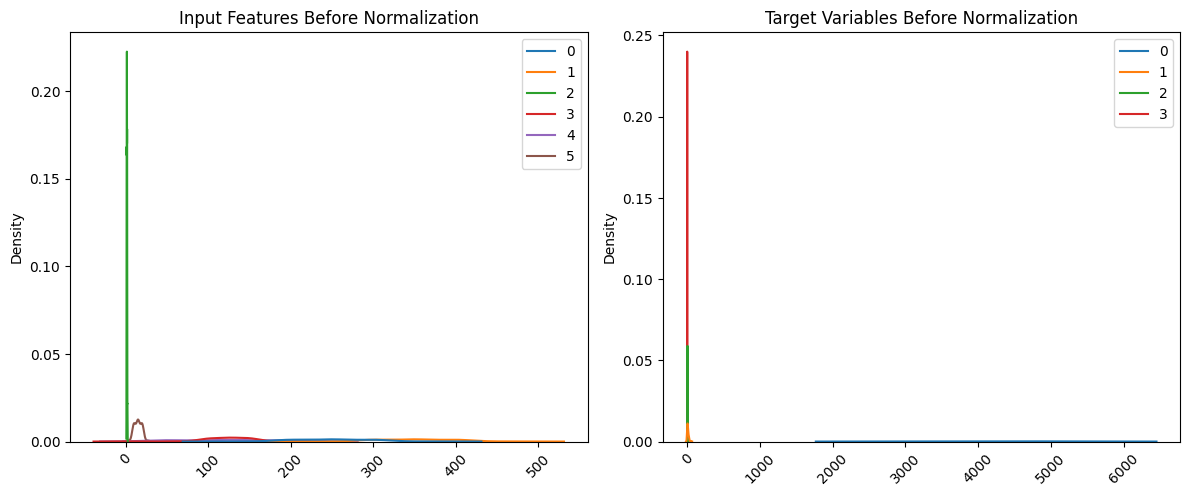

In [101]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.kdeplot(data= X_train)
plt.title("Input Features Before Normalization")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.kdeplot(data = y_train)
plt.title("Target Variables Before Normalization")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

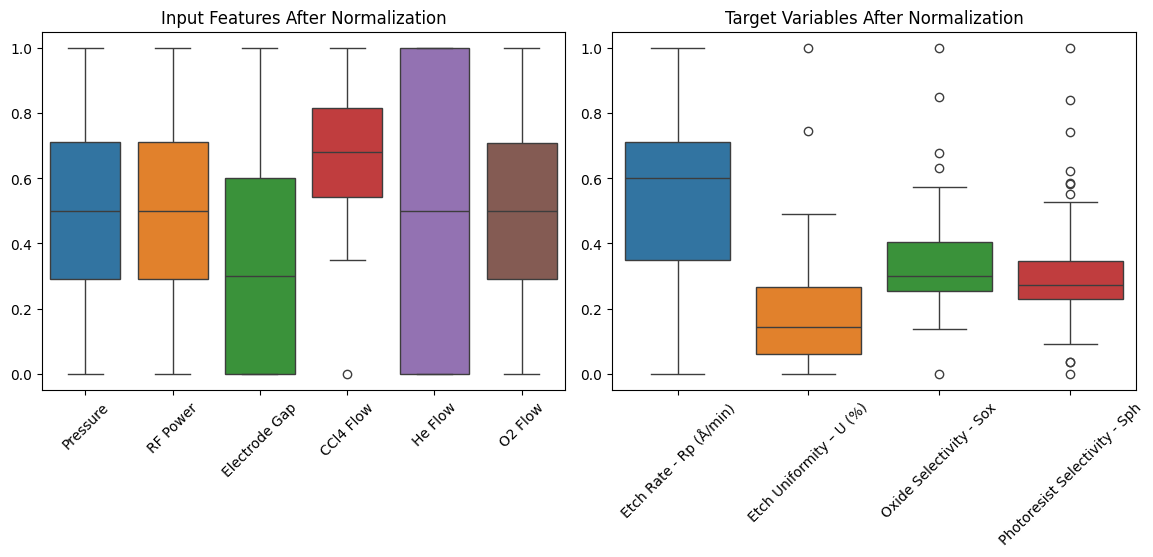

In [103]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=input_names))
plt.title("Input Features After Normalization")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data=pd.DataFrame(y_train_scaled, columns = target_names))
plt.title("Target Variables After Normalization")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

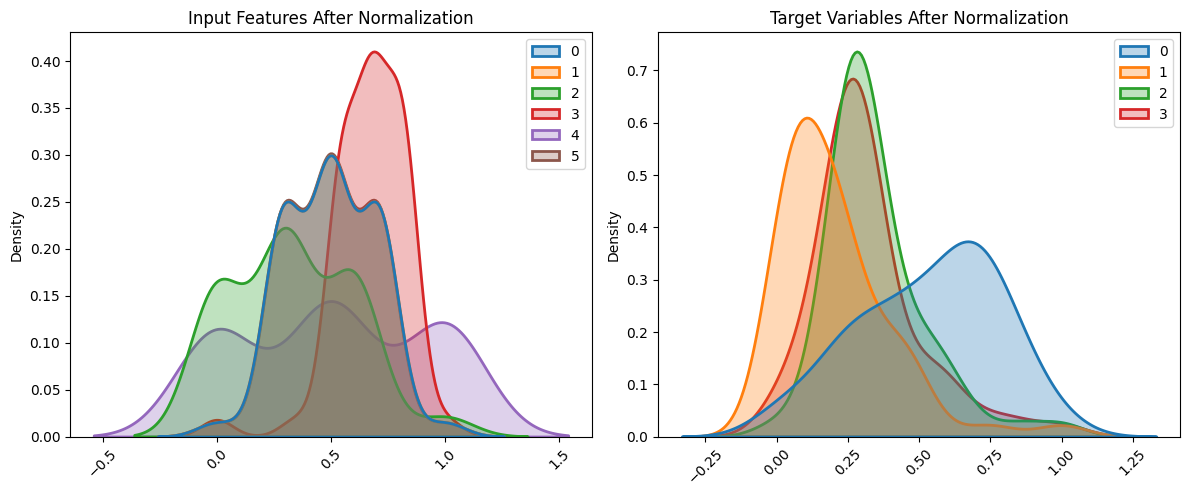

In [104]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.kdeplot(data=pd.DataFrame(X_train_scaled),fill=True, alpha = .3, linewidth = 2)
plt.title("Input Features After Normalization")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.kdeplot(data=pd.DataFrame(y_train_scaled),fill = True, alpha = .3, linewidth = 2)
plt.title("Target Variables After Normalization")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_scaled, test_size=0.2, random_state=1)

###  **Hyper-Tuning Parametrs**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam


def create_model(n_inputs, n_outputs, learning_rate=0.001, n_layers=1, n_neurons=10):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=n_inputs, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model

def build_model(learning_rate=0.001, n_layers=1, n_neurons=10):
    return create_model(
        n_inputs=X_train_scaled.shape[1],
        n_outputs=y_train_scaled.shape[1],
        learning_rate=learning_rate,
        n_layers=n_layers,
        n_neurons=n_neurons
    )

model = KerasRegressor(build_fn=build_model, verbose=0)

param_grid = {
    'batch_size': [10, 16, 32, 64], 
    'epochs': [50, 100, 200, 300],  
    'optimizer__learning_rate': [0.001, 0.01, 0.1],
    'model__n_neurons': [10, 14, 20, 30]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

grid_result = grid.fit(X_train_scaled, y_train_scaled, verbose=0)
best_params = grid_result.best_params_
print("Best Parameters:", best_params)
print("Best MSE Score:", -grid_result.best_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a 

Best Parameters: {'batch_size': 10, 'epochs': 300, 'model__n_neurons': 30, 'optimizer__learning_rate': 0.001}
Best MSE Score: 0.022695221933047415


### **Model Creation And Evaluation**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(90, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(70, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    model.compile(
        loss='mean_squared_error', 
        optimizer='adam', 
        metrics=['mean_absolute_error']
    )
    return model
n_inputs = X_train_scaled.shape[1]
n_outputs = y_train_scaled.shape[1]
model = get_model(n_inputs, n_outputs)
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=1000,
    verbose=0        
)
print("Model Metrics:", model.metrics_names)

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = mean_squared_error(y_test_scaled, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test_scaled, y_pred)
variance = np.var(y_test_scaled - y_pred)

print("\nTest Metrics:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Variance: {variance:.4f}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Metrics: ['loss', 'compile_metrics']
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Test Metrics:
R²: 0.9675
MSE: 0.0013
RMSE: 0.0351
MAE: 0.0163
Variance: 0.0013


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Visualization of Data**

### **Scatter-Plots**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


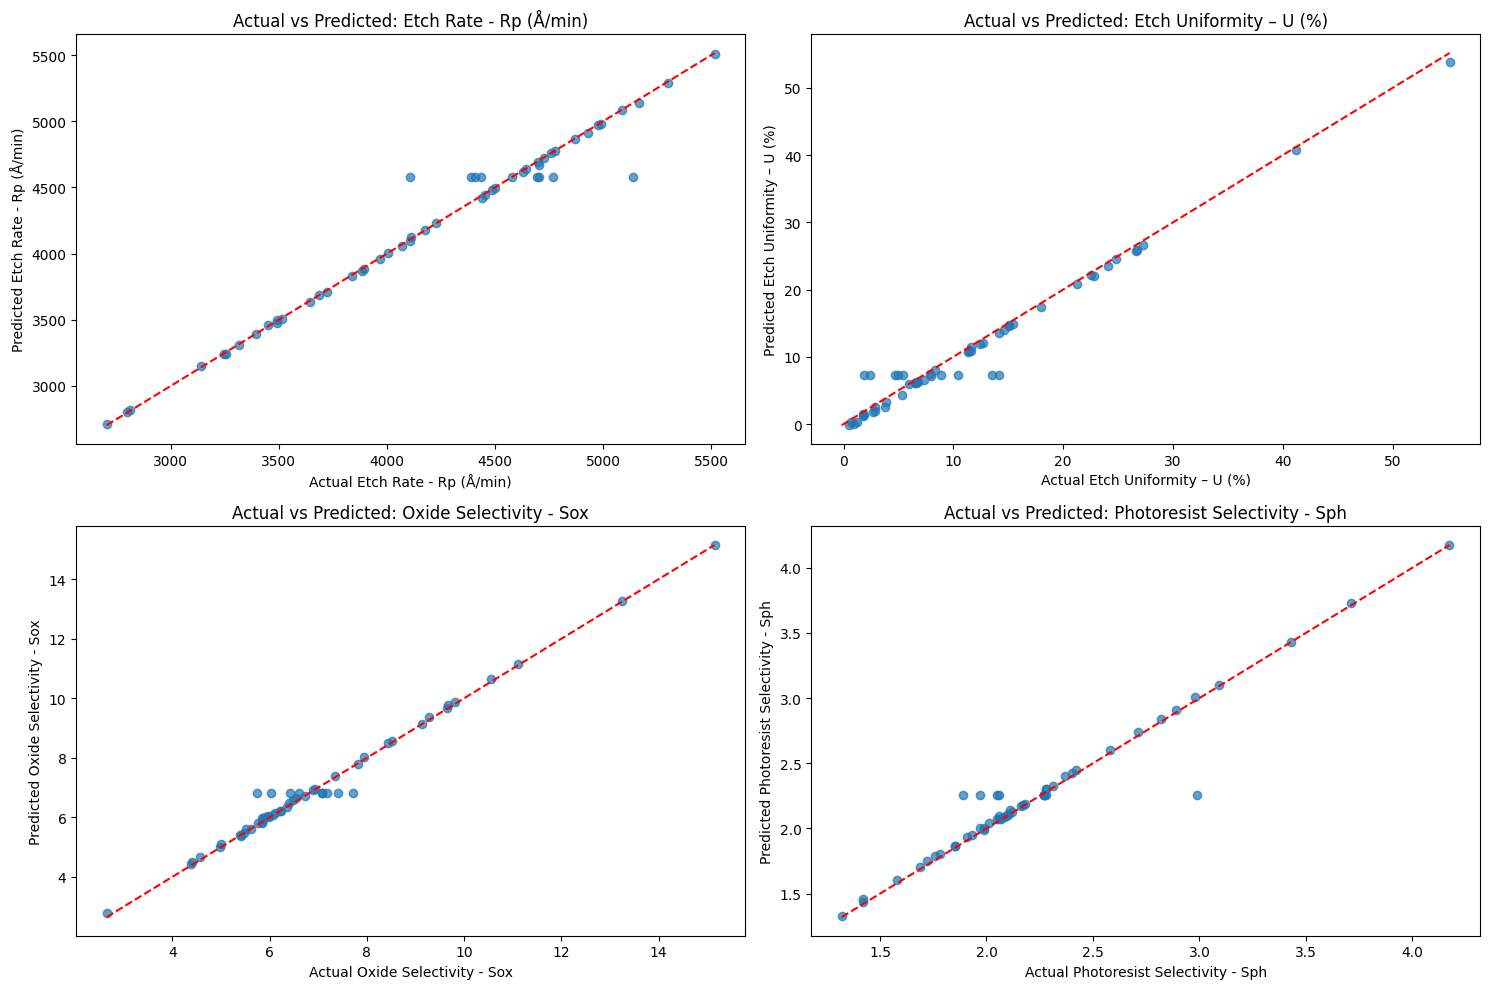

In [105]:
y_test_original = scaler_y.inverse_transform(y_test_scaled)
test_pred_scaled = model.predict(X_test_scaled)
test_pred_original = scaler_y.inverse_transform(test_pred_scaled)
plt.figure(figsize=(15, 10))
for i, target in enumerate(target_names):
    plt.subplot(2, 2, i + 1)
    plt.scatter(y_test_original[:, i], test_pred_original[:, i], alpha=0.7)
    min_val = min(np.min(y_test_original[:, i]), np.min(test_pred_original[:, i]))
    max_val = max(np.max(y_test_original[:, i]), np.max(test_pred_original[:, i]))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Actual vs Predicted: {target}')
plt.tight_layout()
plt.show()

## **Residual plots**

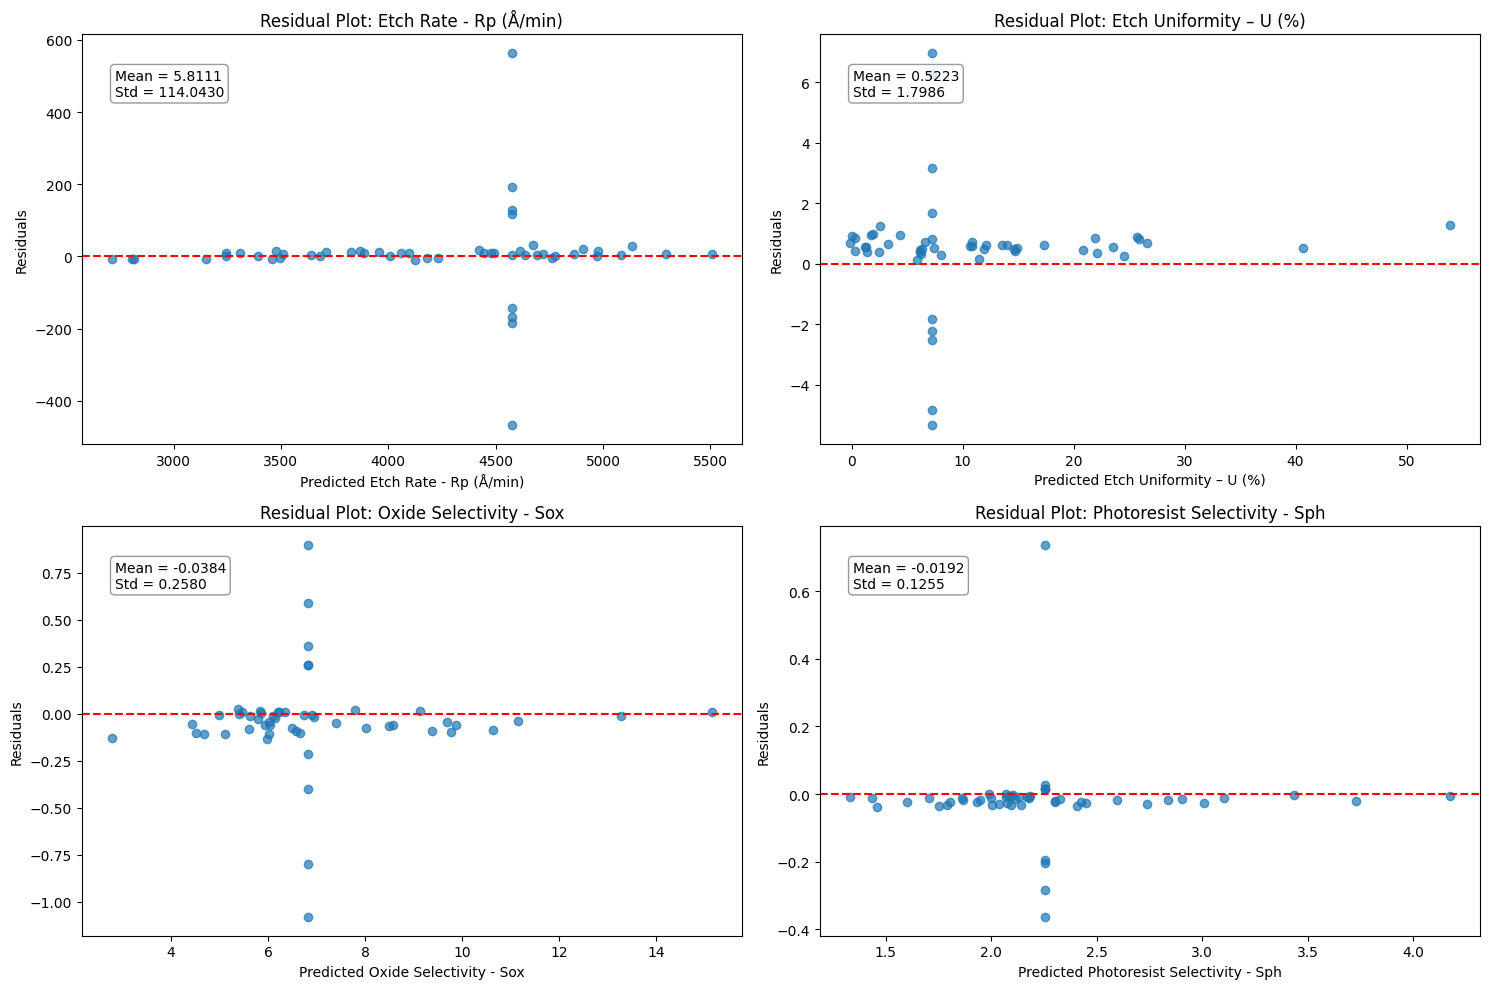

In [106]:
plt.figure(figsize=(15, 10))
for i, target in enumerate(target_names):
    residuals = y_test_original[:, i] - test_pred_original[:, i]
    plt.subplot(2, 2, i + 1)
    plt.scatter(test_pred_original[:, i], residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(f'Predicted {target}')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot: {target}')
    mean_error = np.mean(residuals)
    std_error = np.std(residuals)
    plt.annotate(f'Mean = {mean_error:.4f}\nStd = {std_error:.4f}', 
                 xy=(0.05, 0.85), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.tight_layout()
plt.show()

## **Sequence Plot of Actual VS Predicted Values**

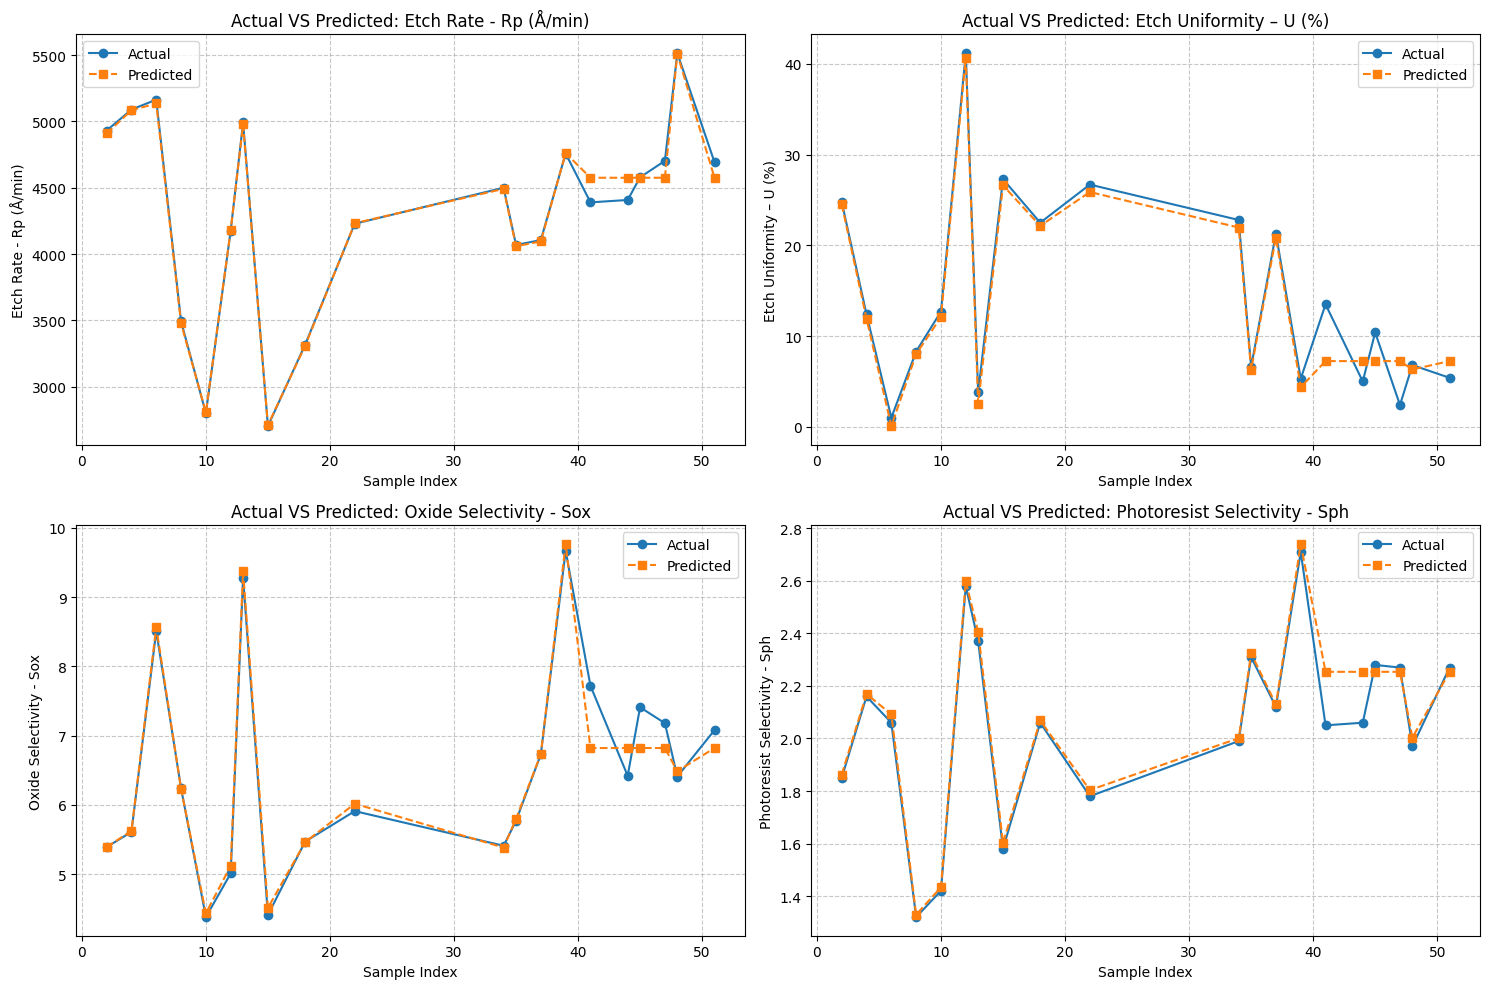

In [107]:
sample_indices = np.random.choice(range(len(y_test_original)), min(20, len(y_test_original)), replace=False)
sample_indices.sort()
plt.figure(figsize=(15, 10))
for i, target in enumerate(target_names):
    plt.subplot(2, 2, i+1)
    plt.plot(sample_indices, y_test_original[sample_indices, i], 'o-', label='Actual')
    plt.plot(sample_indices, test_pred_original[sample_indices, i], 's--', label='Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel(target)
    plt.title(f'Actual VS Predicted: {target}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()